# <center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>


## **<center>ML1: TELECOM CHURN PREDICTION</center>**

<a name = Section2></a>
# **Problem Statement**
---

The company suffers from the following problems:

- Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.

- They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.

- In return, they have decided to find a more optimal way and hired a team of data scientists to solve this problem.

<a name = Section33></a>
### **Importing Libraries**

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")  

<a name = Section33></a>
### **Data Acquisition**

In [227]:
train=pd.read_csv('Churn_train.csv')
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


### Dataset Feature Description
The Dataset contains the following columns:

||Column Name|Description|
|:--|:--|:--|
||**CustomerID**| Passenger Identity |
||**Gender	Whether**| Whether the customer is a male or a female |
||**SeniorCitizen**| Whether the customer is a senior citizen or not (1, 0) |
||**Partner	Whether**| the customer has a partner or not (Yes, No) |
||**Dependents**| Whether the customer has dependents or not (Yes, No)|
||**Tenure**| Number of months the customer has stayed with the company |
||**PhoneService**| Whether the customer has a phone service or not (Yes, No) |
||**MultipleLines**| Whether the customer has multiple lines or not (Yes, No, No phone service) |
||**InternetService**| Customer’s internet service provider (DSL, Fiber optic, No)|
||**OnlineSecurity**| Whether the customer has online security or not (Yes, No, No internet service)|
||**OnlineBackup**| Whether the customer has online backup or not (Yes, No, No internet service)|
||**DeviceProtection**| Whether the customer has device protection or not (Yes, No, No internet service)|
||**TechSupport**| Whether the customer has tech support or not (Yes, No, No internet service) |
||**StreamingTV**| Whether the customer has streaming TV or not (Yes, No, No internet service)|
||**StreamingMovies**| Whether the customer has streaming movies or not (Yes, No, No internet service) |
||**Contract**| The contract term of the customer (Month-to-month, One year, Two year)|
||**PaperlessBilling**| Whether the customer has paperless billing or not (Yes, No)|
||**PaymentMethod**| The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
||**MonthlyCharges**| The amount charged to the customer monthly|
||**TotalCharges**| The total amount charged to the customer|
||**Churn**| Whether the customer churned or not (Yes or No)|

<a name = Section41></a>
### **Data Info, Data Description and Null Value Checking**

- In this section we will get **description** and **statistics** about the data.

In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [229]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5634.0,0.161874,0.368368,0.00,0.0,0.000,0.00,1.00
tenure,5634.0,32.277955,24.555211,0.00,9.0,29.000,55.00,72.00
MonthlyCharges,5634.0,64.779127,30.104993,18.25,35.4,70.375,89.85,118.65


In [230]:
train['tenure'].value_counts()

1     485
72    283
2     194
3     165
71    147
     ... 
45     46
21     45
39     43
36     38
0       8
Name: tenure, Length: 73, dtype: int64

In [231]:
from pandas_profiling import ProfileReport
profile=ProfileReport(train,title='Pandas Profile Report')
profile.to_widgets()

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [232]:
train1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5379,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,71.55,71.55,Yes
1983,Female,0,No,No,3,Yes,No,Fiber optic,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,85.80,272.20,Yes
3321,Male,0,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card,105.00,7133.25,Yes


In [233]:
#Dropping customerID column as it is highly co-ordinality column
train.drop(columns=['customerID'],inplace=True)

In [234]:
train['PaymentMethod'].value_counts()

Electronic check             1893
Mailed check                 1305
Bank transfer (automatic)    1219
Credit card (automatic)      1217
Name: PaymentMethod, dtype: int64

In [235]:
#change the 'No phone/internet service' to 'No', because it's not adding any new informaion
train=train.replace(to_replace='No internet service',value='No')
train=train.replace(to_replace='No phone service',value='No')

In [236]:
train.sample(n=3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3411,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,69.10,69.1,Yes
4627,Male,0,Yes,No,67,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),25.60,1784.9,No
1913,Female,0,Yes,Yes,33,Yes,Yes,No,No,No,No,No,No,No,One year,No,Credit card (automatic),24.15,800.3,No


In [237]:
cols=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [238]:
le=LabelEncoder()

In [239]:
encodingdata=train[cols].apply(le.fit_transform)

In [240]:
train.drop(columns=cols,inplace=True)

In [241]:
train=train.join(encodingdata[cols])

In [242]:
train.sample(n=3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
3020,0,53,19.85,1039.45,0,1,1,1,0,2,0,0,0,0,0,0,1,1,0,0
4961,0,35,59.60,2094.9,1,0,0,1,1,0,1,0,1,0,0,0,0,1,2,0
2081,0,25,54.75,1266.35,0,0,1,1,0,0,0,1,0,1,0,0,1,1,1,0


In [243]:
train['TotalCharges'] = train['TotalCharges'].replace(' ', value=0)
train.TotalCharges = pd.to_numeric(train.TotalCharges)

In [244]:
ss=StandardScaler()

In [245]:
scalardata=ss.fit(train[['tenure','MonthlyCharges','TotalCharges']])
data=scalardata.transform(train[['tenure','MonthlyCharges','TotalCharges']])
data=pd.DataFrame(data,columns=['tenure','MonthlyCharges','TotalCharges'])
train.drop(columns=['tenure','MonthlyCharges','TotalCharges'],inplace=True)
train=train.join(data)

In [246]:
train.sample(n=3)

,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
965,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,1,0,-0.337146,-1.472615,-0.772247
4092,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,2,1,-1.273894,0.372758,-0.971412
4934,0,1,1,0,1,1,1,1,1,0,1,1,1,2,1,1,0,1.617806,1.500578,2.460042


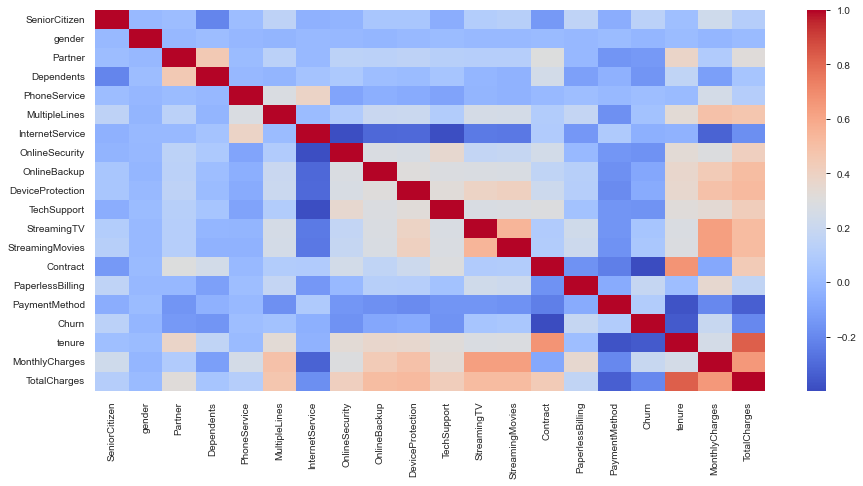

In [326]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),cmap = "coolwarm")
plt.show()

In [247]:
X=train.drop('Churn',axis=1)
y=train['Churn']

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

##### Working on Test dataset 

In [249]:
test=pd.read_csv('Churn_test.csv')

In [250]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [251]:
test.drop(columns=['customerID'],inplace=True)

In [252]:
#change the 'No phone/internet service' to 'No', because it's not adding any new informaion
test=test.replace(to_replace='No internet service',value='No')
test=test.replace(to_replace='No phone service',value='No')

In [253]:
cols1=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

In [254]:
encodingdatatest=test[cols1].apply(le.fit_transform)

In [255]:
test.drop(columns=cols1,inplace=True)

In [256]:
test=test.join(encodingdatatest[cols1])

In [257]:
test['TotalCharges'] = test['TotalCharges'].replace(' ', value=0)
test.TotalCharges = pd.to_numeric(test.TotalCharges)

In [258]:
scalardatatest=ss.fit(test[['tenure','MonthlyCharges','TotalCharges']])
datatest=scalardatatest.transform(test[['tenure','MonthlyCharges','TotalCharges']])
datatest=pd.DataFrame(datatest,columns=['tenure','MonthlyCharges','TotalCharges'])
test.drop(columns=['tenure','MonthlyCharges','TotalCharges'],inplace=True)
test=test.join(datatest)

In [259]:
test.sample(n=3)

,SeniorCitizen,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
66,1,1,0,0,1,1,0,1,1,0,1,0,0,2,1,0,1.394058,-0.004728,0.864582
936,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,2,-1.169730,-0.316082,-0.911839
15,0,0,1,0,1,1,2,0,0,0,0,0,0,2,0,1,1.597534,-1.321739,-0.193878


#### Logistic Regression

In [260]:
lr=LogisticRegression()

In [261]:
lr.fit(X_train,y_train)

LogisticRegression()

In [262]:
lr_predictions=lr.predict(X_test)

In [263]:
print(confusion_matrix(y_test,lr_predictions))
print(classification_report(y_test,lr_predictions))
print("Accuracy Score {}".format(accuracy_score(y_test,lr_predictions)))

[[734  80]
 [138 175]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       814
           1       0.69      0.56      0.62       313

    accuracy                           0.81      1127
   macro avg       0.76      0.73      0.74      1127
weighted avg       0.80      0.81      0.80      1127

Accuracy Score 0.8065661047027507


#### Decision Tree

In [264]:
dtc=DecisionTreeClassifier()

In [265]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [266]:
dt_predictions=dtc.predict(X_test)

In [267]:
print(confusion_matrix(y_test,dt_predictions))
print(classification_report(y_test,dt_predictions))
print("Accuracy Score {}".format(accuracy_score(y_test,dt_predictions)))

[[650 164]
 [144 169]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       814
           1       0.51      0.54      0.52       313

    accuracy                           0.73      1127
   macro avg       0.66      0.67      0.67      1127
weighted avg       0.73      0.73      0.73      1127

Accuracy Score 0.7267080745341615


#### Random Forest

In [268]:
rfc=RandomForestClassifier()

In [269]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [270]:
rf_predictions=rfc.predict(X_test)

In [271]:
print(confusion_matrix(y_test,rf_predictions))
print(classification_report(y_test,rf_predictions))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_predictions)))

[[743  71]
 [157 156]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       814
           1       0.69      0.50      0.58       313

    accuracy                           0.80      1127
   macro avg       0.76      0.71      0.72      1127
weighted avg       0.79      0.80      0.79      1127

Accuracy Score 0.7976929902395741


#### Randomized Search Cv - Random Forest

In [272]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [273]:
rf_randomcv=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [274]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'gini'}

In [275]:
best_random_grid=rf_randomcv.best_estimator_

In [276]:
rf_predictions_rs=best_random_grid.predict(X_test)

In [277]:
print(confusion_matrix(y_test,rf_predictions_rs))
print(classification_report(y_test,rf_predictions_rs))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_predictions_rs)))

[[749  65]
 [155 158]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       814
           1       0.71      0.50      0.59       313

    accuracy                           0.80      1127
   macro avg       0.77      0.71      0.73      1127
weighted avg       0.80      0.80      0.79      1127

Accuracy Score 0.8047914818101154


#### Predicting for Test dataset with RandomForest with Randomized Search as I got best Accuracy score for this

In [278]:
predictions=best_random_grid.predict(test)

In [279]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv',index=False,header=False)

#### Trying with another option, removing, TotalCharges, MonthlyCharges and using OneHot Encoding with Contract and PaymentMethod

In [280]:
df_train=pd.read_csv('Churn_train.csv')
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [281]:
df_train.drop(columns=['customerID','MonthlyCharges','TotalCharges'],inplace=True)

In [282]:
#change the 'No phone/internet service' to 'No', because it's not adding any new informaion
df_train=df_train.replace(to_replace='No internet service',value='No')
df_train=df_train.replace(to_replace='No phone service',value='No')

In [283]:
df_train['PaymentMethod']=df_train['PaymentMethod'].replace(to_replace='Bank transfer (automatic)',value='Bank transfer')
df_train['PaymentMethod']=df_train['PaymentMethod'].replace(to_replace='Credit card (automatic)',value='Credit card')

In [284]:
cols2=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [285]:
data_encode=df_train[cols2].apply(le.fit_transform)

In [286]:
df_train.drop(columns=cols2,inplace=True)

In [287]:
df_train=df_train.join(data_encode[cols2])

In [288]:
df_train.sample(n=3)

,SeniorCitizen,tenure,Contract,PaymentMethod,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
5279,0,4,Month-to-month,Electronic check,1,0,0,1,1,1,0,0,0,0,0,1,1,1
1676,0,22,One year,Credit card,1,1,0,1,0,0,1,0,0,1,0,0,1,0
5587,1,58,Month-to-month,Electronic check,1,1,0,1,1,1,0,0,1,0,1,1,1,1


In [289]:
df_train=pd.get_dummies(df_train,columns=['Contract','PaymentMethod'],drop_first=True)

In [290]:
df_train.sample(n=3)

,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
5428,1,22,1,0,0,1,1,1,0,0,...,0,1,1,1,1,0,0,0,1,0
4187,0,68,1,0,0,1,1,2,0,0,...,0,0,0,1,0,0,1,0,0,0
4708,0,11,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [291]:
X=df_train.drop('Churn',axis=1)
y=df_train['Churn']

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#### Working with Test Data

In [293]:
df_test=pd.read_csv('Churn_test.csv')
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [294]:
df_test.drop(columns=['customerID','MonthlyCharges','TotalCharges'],inplace=True)

In [295]:
#change the 'No phone/internet service' to 'No', because it's not adding any new informaion
df_test=df_test.replace(to_replace='No internet service',value='No')
df_test=df_test.replace(to_replace='No phone service',value='No')

In [296]:
df_test['PaymentMethod']=df_test['PaymentMethod'].replace(to_replace='Bank transfer (automatic)',value='Bank transfer')
df_test['PaymentMethod']=df_test['PaymentMethod'].replace(to_replace='Credit card (automatic)',value='Credit card')

In [297]:
cols3=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

In [298]:
data_encode_test=df_test[cols3].apply(le.fit_transform)

In [299]:
df_test.drop(columns=cols3,inplace=True)

In [300]:
df_test=df_test.join(data_encode_test[cols3])

In [301]:
df_test.sample(n=3)

,SeniorCitizen,tenure,Contract,PaymentMethod,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
1214,0,52,Month-to-month,Electronic check,1,1,0,0,0,0,1,0,0,0,0,1,1
1040,0,22,Month-to-month,Mailed check,1,0,0,1,0,1,0,1,0,0,1,1,1
255,0,28,Month-to-month,Bank transfer,0,0,0,1,0,0,0,0,1,0,1,0,1


In [302]:
df_test=pd.get_dummies(df_test,columns=['Contract','PaymentMethod'],drop_first=True)

In [303]:
df_test.sample(n=3)

,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
547,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
586,0,60,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0
497,0,53,0,1,0,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0


#### Logistic Regression

In [304]:
lr.fit(X_train,y_train)

LogisticRegression()

In [305]:
lr_predictions1=lr.predict(X_test)

In [306]:
print(confusion_matrix(y_test,lr_predictions1))
print(classification_report(y_test,lr_predictions1))
print("Accuracy Score {}".format(accuracy_score(y_test,lr_predictions1)))

[[749  65]
 [163 150]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       814
           1       0.70      0.48      0.57       313

    accuracy                           0.80      1127
   macro avg       0.76      0.70      0.72      1127
weighted avg       0.79      0.80      0.78      1127

Accuracy Score 0.7976929902395741


#### Decision Tree

In [307]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [308]:
dt_predictions=dtc.predict(X_test)

In [309]:
print(confusion_matrix(y_test,dt_predictions))
print(classification_report(y_test,dt_predictions))
print("Accuracy Score {}".format(accuracy_score(y_test,dt_predictions)))

[[663 151]
 [151 162]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       814
           1       0.52      0.52      0.52       313

    accuracy                           0.73      1127
   macro avg       0.67      0.67      0.67      1127
weighted avg       0.73      0.73      0.73      1127

Accuracy Score 0.7320319432120674


#### Random Forest

In [310]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [311]:
rf_predictions=rfc.predict(X_test)

In [312]:
print(confusion_matrix(y_test,rf_predictions))
print(classification_report(y_test,rf_predictions))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_predictions)))

[[743  71]
 [165 148]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       814
           1       0.68      0.47      0.56       313

    accuracy                           0.79      1127
   macro avg       0.75      0.69      0.71      1127
weighted avg       0.78      0.79      0.78      1127

Accuracy Score 0.7905944986690329


#### Randomized Search Cv - Random Forest

In [313]:
rf_randomcv1=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv1.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [314]:
rf_randomcv1.best_params_

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [315]:
best_random_grid1=rf_randomcv1.best_estimator_

In [316]:
rf_predictions_rs1=best_random_grid1.predict(X_test)

In [317]:
print(confusion_matrix(y_test,rf_predictions_rs1))
print(classification_report(y_test,rf_predictions_rs1))
print("Accuracy Score {}".format(accuracy_score(y_test,rf_predictions_rs1)))

[[763  51]
 [161 152]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       814
           1       0.75      0.49      0.59       313

    accuracy                           0.81      1127
   macro avg       0.79      0.71      0.73      1127
weighted avg       0.80      0.81      0.80      1127

Accuracy Score 0.8118899733806566


#### Predicting for Test dataset with RandomForest with Randomized Search as I got best Accuracy score for this

In [318]:
predictions1=best_random_grid1.predict(df_test)

In [319]:
prediction1 = pd.DataFrame(predictions1, columns=['predictions']).to_csv('prediction1.csv',index=False,header=False)

In [320]:
df=pd.DataFrame(predictions1, columns=['predictions'])

In [321]:
df=df.replace(to_replace=1,value='Yes')
df=df.replace(to_replace=0,value='No')

In [322]:
df = df.to_csv('prediction1.csv')